# Basic regression: Predict fuel efficiency

이 강좌는 [Tensorflow 공식 튜리얼](https://www.tensorflow.org/tutorials/keras/regression)에 기반하고 있다. 하지만 데이터의 전처리 과정 등 일부분이 이 수업의 목적에 맞게 수정되었다.

분류(classification) 문제가 정해진 클래스들의 리스트로부터(예를 들면 '개', '고양이', '양') 하나를 선택하는 것이 목적이라면, 
회귀(Regression) 문제는 예를 들면 '가격'이나 '확률' 등과 같이 연속적인(continuous) 값을 예측하는 것이 목적이다. 

이 강좌에서는 잘 알려진 [Auto MPG](https://archive.ics.uci.edu/ml/datasets/auto+mpg) Dataset을 이용하여 자동차들의 연비(fuel efficiency)를 예측하는 문제를 다룬다. 각 자동차에 대해서 실린더의 개수, 배기량, 마력, 무게 등의 데이터를 사용한다. 이 강좌에서 사용되는 데이터 셋의 출처는 [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/)이다.

## The Auto MPG dataset


## Get the data
이 강좌의 [원본](https://www.tensorflow.org/tutorials/keras/regression)에서는 데이터 셋을 온라인으로 다운로드하지만 우리는 파일로 부터 읽는다. 다음의 [csv 파일](https://www.dropbox.com/s/ll54m8umdi2i00i/auto-mpg.data.csv?dl=0)을 다운로드하여 google drive의 적절한 디렉토리에 저장해 둔다.

구글 드라이로부터 파일을 읽기 위해서 다음과 같이 구글 드라이브를 마운트한다.

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Python에서는 csv 파일을 읽고 처리하는 여러 가지 방법이 있다. 가장 간단한 것은 이 강좌의 원본에서처럼 Pandas를 사용하는 것이다. 하지마 우리는 우선 numpy만을 이용해서 csv 파일을 읽고 조작해볼 것이다. 이렇게 하는 이유는 좀 더 세부적으로 어떤 일이 어떻게 일어나는지는 인식하기 위해서이다.

Numpy는 csv 파일을 읽기위한 `genfromtxt()` 메서드를 제공한다. csv 파일의 첫 행에는 필드 이름이 저장되어 있다. 이 행을 건너뛰기 위해서 `skip_header=1`로 지정하였다. 

아래의 코드에서 `dtype`을 `None`으로 지정한 경우와 그렇지 않은 경우의 차이를 확인하라. 우리는 수치 데이터에만 관심이 있으므로 `dtype`을 지정하지 않았고, 그러면 수치 데이터가 아닌 항목들은 `nan`이라는 값으로 인식된다. 여기서 `nan`은 'not a number'의 약자이다.

In [1]:
import numpy as np

# table = np.genfromtxt('/content/drive/My Drive/DataScience2020/assets/auto-mpg.data.csv', delimiter=',', dtype=None, skip_header=1)
table = np.genfromtxt('auto-mpg.data.csv', delimiter=',', skip_header=1)
print(table)

[[ 18.   8. 307. ...  70.   1.  nan]
 [ 15.   8. 350. ...  70.   1.  nan]
 [ 18.   8. 318. ...  70.   1.  nan]
 ...
 [ 32.   4. 135. ...  82.   1.  nan]
 [ 28.   4. 120. ...  82.   1.  nan]
 [ 31.   4. 119. ...  82.   1.  nan]]


읽혀진 테이블로부터 `nan`값이 저장된 마지막 열(column)을 제거한다. 

In [90]:
table = table[:, :-1]
print(table)

[[ 18.    8.  307.  ...  12.   70.    1. ]
 [ 15.    8.  350.  ...  11.5  70.    1. ]
 [ 18.    8.  318.  ...  11.   70.    1. ]
 ...
 [ 32.    4.  135.  ...  11.6  82.    1. ]
 [ 28.    4.  120.  ...  18.6  82.    1. ]
 [ 31.    4.  119.  ...  19.4  82.    1. ]]


테이블을 잘 살펴보면 마지막 마지막 행이 아닌 곳에도 `nan` 값이 일부 남아 있다. 일부 행(row)의 HorsePower 항목이 누락되어 있기 때문이다. 이 행들을 모두 찾아서 제거해야 한다. 이를 위해서 `numpy.any()` 함수를 이용한다.

In [96]:
print(table.shape)
print(np.isnan(table))
# print(np.isnan(table).all())
# print(np.isnan(table).any())

ind = np.isnan(table).any(axis=1)
print(ind)



(398, 8)
[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]
[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False  True False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False Fal

Boolean array indexing을 이용하여 nan값이 포함된 모든 행을 제거한다.

In [97]:
table = table[~ind, :]
print(table)
print(table.shape)

[[ 18.    8.  307.  ...  12.   70.    1. ]
 [ 15.    8.  350.  ...  11.5  70.    1. ]
 [ 18.    8.  318.  ...  11.   70.    1. ]
 ...
 [ 32.    4.  135.  ...  11.6  82.    1. ]
 [ 28.    4.  120.  ...  18.6  82.    1. ]
 [ 31.    4.  119.  ...  19.4  82.    1. ]]
(392, 8)


이 테이블의 각 열은 순서대로 'MPG(연비)', 'Cylinder의 개수', '배기량', '마력', '무게', '가속력', '생산년도', 그리고 '생산지'이다. 생산지에서 1은 USA, 2는 유럽, 3은 일본을 나타낸다.

마지막 항목인 '생산지'는 다른 항목들과는 본질적으로 다른 유형의 값이다.

일반적으로 어떤 변수는 다음과 같이 유형을 분류할 수 있다.

* Numerical variable: 년도, 나이, 점수, 무게, 길이 등
* Ordinal variable: 등급, 학점등급(A, B, C, D, F), 학력(초졸, 중졸, 고졸, 대졸)
* Categorical variable: 혈액형, 지역, 성별, 인종, 색깔

categorial variable인 '생상지'를 one-hot encode한다.

In [100]:
target = table[:, -1].astype(np.int)
print(target)
values = np.unique(target)
print(values)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 1 1 1 3 2 2 2 2 2 1 1 1 1 1 3 1 3 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 3 3 2 1 3 1 2 1 1 1 1 1 1 1 1 1 1 1 3 1 1 1
 1 2 2 2 2 1 3 3 1 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 3 1 3 3
 1 1 2 1 1 2 2 2 2 1 2 3 1 1 1 1 3 1 3 1 1 1 1 1 1 1 1 1 2 2 2 3 3 1 2 2 3
 3 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 1 1 1 3 2 3 1 2 1 2 2 2 2 3 2 2 1 1 2
 1 1 1 1 1 1 1 1 1 1 2 3 1 1 1 1 2 3 3 1 2 1 2 3 2 1 1 1 1 3 1 2 1 3 1 1 1
 1 1 1 1 1 1 1 1 1 2 1 3 1 1 1 3 2 3 2 3 2 1 3 3 3 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 3 3 1 3 1 1 3 2 2 2 2 2 3 1 1 1 1 1 1 1 1 1 1 1 1 1 2 3 1 1 2
 1 2 1 1 1 3 2 1 1 1 1 2 3 1 3 1 1 1 1 2 3 3 3 3 3 1 3 2 2 2 2 3 3 2 3 3 2
 3 1 1 1 1 1 3 1 3 3 3 3 3 1 1 1 2 3 3 3 3 2 2 3 3 1 1 1 1 1 1 1 1 1 1 1 2
 3 3 1 1 3 3 3 3 3 3 1 1 1 1 3 1 1 1 2 1 1 1]
[1 2 3]


In [102]:
t = np.identity(values.shape[0])
print(t.shape)
print(t)

encoded = t[target-1]  # integer array indexing
print(encoded.shape)
print(encoded)

(3, 3)
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
(392, 3)
[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 ...
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]


이제 원래의 테이블에서 마지막 열(column)을 이렇게 one-hot 인코드된 데이터로 교체한다.

In [103]:
table = np.concatenate((table[:, :-1], encoded), axis=1)
print(table.shape)
print(table)

(392, 10)
[[ 18.   8. 307. ...   1.   0.   0.]
 [ 15.   8. 350. ...   1.   0.   0.]
 [ 18.   8. 318. ...   1.   0.   0.]
 ...
 [ 32.   4. 135. ...   1.   0.   0.]
 [ 28.   4. 120. ...   1.   0.   0.]
 [ 31.   4. 119. ...   1.   0.   0.]]


이제 데이터를 train 데이터와 test데이터로 분할하자. 분할하기 전에 먼저 테이블의 행들을 랜덤 셔플링해야 한다.

In [104]:
# shuffling rows
np.random.shuffle(table)

n = table.shape[0]
train_dataset = table[0:int(0.8*n), :]
test_dataset = table[int(0.8*n):, :]

print(train_dataset.shape)
print(test_dataset.shape)

(313, 10)
(79, 10)


우리의 목적은 다른 변수들로 부터 자동차의 연비를 예측하는 것이므로 연비 정보를 저장하는 첫 행을 label로, 나머지 행들을 feature로 분할한다.

In [105]:
train_features = train_dataset[:, 1:]
test_features = test_dataset[:, 1:]
print(train_features.shape)
print(test_features.shape)

train_labels = train_dataset[:, 0]
test_labels = test_dataset[:, 0]
print(train_labels.shape)
print(test_labels.shape)


(313, 9)
(79, 9)
(313,)
(79,)


## Using Pandas
지금까지 numpy만을 이용하여 했던 일을 pandas를 사용해서 해보자.




### Get the data

In [22]:
import pandas as pd

In [24]:
# column_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
#                 'Acceleration', 'Model Year', 'Origin']

raw_dataset = pd.read_csv('/content/drive/My Drive/DataScience2020/assets/auto-mpg.data.csv',
                          na_values='?', sep=',', skipinitialspace=True, header=0)

raw_dataset.pop('Comment')
dataset = raw_dataset.copy()
print(dataset.tail())
print(dataset.shape)

      MPG  Cylinders  Displacement  ...  Acceleration  Model Year  Origin
393  27.0          4         140.0  ...          15.6          82       1
394  44.0          4          97.0  ...          24.6          82       2
395  32.0          4         135.0  ...          11.6          82       1
396  28.0          4         120.0  ...          18.6          82       1
397  31.0          4         119.0  ...          19.4          82       1

[5 rows x 8 columns]
(398, 8)


### Clean the **data**

In [25]:
print(dataset.isna().sum())

dataset = dataset.dropna()
print(dataset.shape)


MPG             0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64
(392, 8)


###One-hot encoding

In [26]:
dataset['Origin'] = dataset['Origin'].map({1: 'USA', 2: 'Europe', 3: 'Japan'})
dataset = pd.get_dummies(dataset, prefix='', prefix_sep='')
dataset.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Europe,Japan,USA
393,27.0,4,140.0,86.0,2790,15.6,82,0,0,1
394,44.0,4,97.0,52.0,2130,24.6,82,1,0,0
395,32.0,4,135.0,84.0,2295,11.6,82,0,0,1
396,28.0,4,120.0,79.0,2625,18.6,82,0,0,1
397,31.0,4,119.0,82.0,2720,19.4,82,0,0,1


### Split the data into train and test

In [27]:
train_dataset = dataset.sample(frac=0.8, random_state=0)
test_dataset = dataset.drop(train_dataset.index)
train_features = train_dataset.copy()
test_features = test_dataset.copy()

train_labels = train_features.pop('MPG')
test_labels = test_features.pop('MPG')

## Normalization

데이터를 정규화하기 위해서 train 데이터에 대해서 열(column) 별로 평균과 표준편차를 계산한다.

In [28]:
train_mean = train_features.mean(axis=0)
train_std = train_features.std(axis=0)
print(train_mean)
print(train_std)

Cylinders          5.477707
Displacement     195.318471
Horsepower       104.869427
Weight          2990.251592
Acceleration      15.559236
Model Year        75.898089
Europe             0.178344
Japan              0.197452
USA                0.624204
dtype: float64
Cylinders         1.699788
Displacement    104.331589
Horsepower       38.096214
Weight          843.898596
Acceleration      2.789230
Model Year        3.675642
Europe            0.383413
Japan             0.398712
USA               0.485101
dtype: float64


### The Normalization layer
위에서 계산한 평균과 표준편자 값을 이용해서 직접 데이터를 정규화할 수도 있지만 Keras는 정규화를 해주는 `preprocessing.Normalization` layer를 제공한다. 따라서 keras의 정규화층을 신경망에 포함하는 것이 좀 더 간단하다. 

In [29]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing
import matplotlib.pyplot as plt

print(tf.__version__)

2.3.0


In [30]:
normalizer = preprocessing.Normalization()

이 정규화 층이 `train_features`에 맞도록 `adapt`함수를 이용해서 설정해준다.

In [31]:
normalizer.adapt(np.array(train_features))

adapt 함수는 train_featured의 각 열의 평균과 분산을 계산하여 nomalizer 층에 저장한다. 

In [32]:
print(normalizer.mean.numpy())

[5.4777069e+00 1.9531847e+02 1.0486943e+02 2.9902517e+03 1.5559236e+01
 7.5898087e+01 1.7834395e-01 1.9745223e-01 6.2420380e-01]


## A DNN regression

In [33]:
def build_and_compile_model(norm):
  model = keras.Sequential([
      norm,
      layers.Dense(64, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(1)
  ])

  model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001))
  return model

In [35]:
dnn_model = build_and_compile_model(normalizer)
dnn_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
normalization_1 (Normalizati (None, 9)                 19        
_________________________________________________________________
dense_3 (Dense)              (None, 64)                640       
_________________________________________________________________
dense_4 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 65        
Total params: 4,884
Trainable params: 4,865
Non-trainable params: 19
_________________________________________________________________


In [36]:
%%time
history = dnn_model.fit(
    train_features, train_labels,
    validation_split=0.2,
    verbose=0, epochs=100)

CPU times: user 3.33 s, sys: 182 ms, total: 3.51 s
Wall time: 3.36 s


In [37]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0, 10])
  plt.xlabel('Epoch')
  plt.ylabel('Error [MPG]')
  plt.legend()
  plt.grid(True)

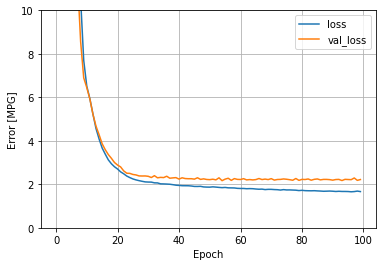

In [38]:
plot_loss(history)

In [39]:
test_results = dnn_model.evaluate(test_features, test_labels, verbose=0)
print(test_results)

1.7818971872329712


## Performance

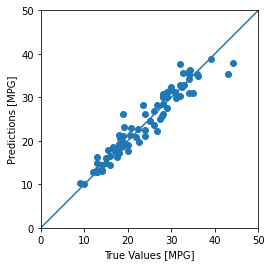

In [44]:
test_predictions = dnn_model.predict(test_features).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
lims = [0, 50]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)


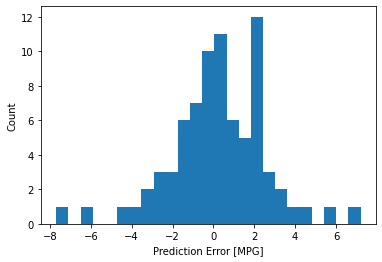

In [45]:
error = test_predictions - test_labels
plt.hist(error, bins=25)
plt.xlabel('Prediction Error [MPG]')
_ = plt.ylabel('Count')

If you're happy with the model save it for later use:

In [47]:
dnn_model.save('dnn_model')

INFO:tensorflow:Assets written to: dnn_model/assets


If you reload the model, it gives identical output:

In [48]:
reloaded = tf.keras.models.load_model('dnn_model')

test_results = reloaded.evaluate(test_features, test_labels, verbose=0)
print(test_results)

1.7818971872329712
